In [262]:
import gensim
%matplotlib inline

In [293]:
import collections
dic = collections.OrderedDict()

import gc
import matplotlib
import pandas as pd
import numpy as np
from pprint import pprint
import pickle

import nltk
from nltk.tokenize import regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import tkinter



import gensim
from gensim.corpora.dictionary import Dictionary
from gensim.models import CoherenceModel
from gensim.models.tfidfmodel import TfidfModel
from gensim import similarities
from gensim.models.word2vec import Word2Vec

import sklearn
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt

import wordcloud
from wordcloud import WordCloud

from collections import defaultdict
import itertools

# clean text data

In [264]:
fulldata=pd.read_csv("fulldataset_cleaned.csv",encoding="utf-8")

In [265]:
textonly=fulldata[["content_cleaned","document_word_count","Y"]]

In [266]:
def clean_text(document,stopword):
    s=document.lower()   
    
    pattern1=r"(\w+\-\w+|\w+)"
    token1=regexp_tokenize(s,pattern1)  
    token2=[word for word in token1 if not word.isdigit()]  
    
    token3=[word for word in token2 if word not in stopword if len(word)>=2]  
    lmtzr = WordNetLemmatizer()
    token6 = [lmtzr.lemmatize(word) for word in token3]
    return token6  

In [267]:
stopword=stopwords.words("english")

In [268]:
corpus_list=[]
for i in textonly.index:
    string=textonly.at[i,"content_cleaned"]
    tokenlist=clean_text(string,stopword)
    corpus_list.append(tokenlist)

In [269]:
# check null values in text after cleaning text
length=[]
for x in corpus_list:
    length.append(len(x))
length=pd.DataFrame(length)
length.describe()

,0
count,2930.000000
mean,8.243686
std,5.143552
min,0.000000
25%,5.000000
50%,8.000000
75%,10.000000
max,84.000000


In [270]:
#comnine length and corpus_list
textonly["length"]=length
textonly["corpus_list"]=corpus_list
textonly.head(5)

D:\anacoda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\anacoda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,content_cleaned,document_word_count,Y,length,corpus_list
0,Yurun profit warning look ugly with loss in 4Q11.,9,meaningful,7,"[yurun, profit, warning, look, ugly, loss, 4q11]"
1,Employers know just how essential [foreign wor...,13,meaningful,7,"[employer, know, essential, foreign, worker, r..."
2,One segment has truly recovered from the Great...,14,meaningful,8,"[one, segment, truly, recovered, great, recess..."
3,Through workforce reductions earlier in the ye...,12,meaningful,7,"[workforce, reduction, earlier, year, reduced,..."
4,"If they're making money, they invest that mone...",17,meaningful,9,"[making, money, invest, money, create, opportu..."


In [271]:
nullcontent_df=textonly[textonly["length"]==0]
nullcontent_df.index

Int64Index([1166, 1167, 1456, 1731, 1772, 2045, 2326, 2659, 2723, 2887], dtype='int64')

In [272]:
# fill nulldata in corpus_list with "nullcontent"
for x in nullcontent_df.index:
    textonly.at[x,"corpus_list"]=["nullcontent"]
textonly.loc[1166,:]

content_cleaned                On E&P
document_word_count                 2
Y                      not meaningful
length                              0
corpus_list             [nullcontent]
Name: 1166, dtype: object

In [273]:
#create new corpus_list and continuing modelling based on this new corpus list
corpus_list=list(textonly["corpus_list"])

D=Dictionary(corpus_list)
print("num_docs",D.num_docs)
print("num_pos",D.num_pos)
print("num_nnz",D.num_nnz)
corpus = [D.doc2bow(corpus) for corpus in corpus_list]

num_docs 2930
num_pos 24164
num_nnz 23544


In [274]:
df=pd.DataFrame(corpus)

In [275]:
tfidf=TfidfModel(corpus)
tfidf_corpus=tfidf[corpus]

In [17]:
# term-document matrix

In [276]:
sentence_list=[]
for doc in corpus_list:
    sentence=""
    for word in doc:
        sentence=sentence+word+" "
    sentence_list.append(sentence)   

In [277]:
sentence_list

['yurun profit warning look ugly loss 4q11 ',
 'employer know essential foreign worker recognition spreading ',
 'one segment truly recovered great recession full employment ',
 'workforce reduction earlier year reduced managerial position ',
 'making money invest money create opportunity job research sen ',
 'watch unemployment rate hit percent april lowest level century ',
 'continues uncertainty regarding potential future tariff trade action said ',
 'excise tax went six state weighted average set increased ',
 'addition proposal would include smokeless tobacco cigar e-cigs within tobacco tax ',
 'instance border adjustment could result tax bank provides service ',
 'first earned married couple completely tax-free feb ',
 'point tax reform big question mark whether get done ',
 'anything republican think important country party comprehensive tax reform ',
 'word reform bill title tax cut job act much tax cut bill ',
 'small one rate reduction said referring individual income tax red

In [278]:
text_cleaned_finish=pd.DataFrame(sentence_list)
text_cleaned_finish.iloc[1310,:]

0    pe 4x 
Name: 1310, dtype: object

In [279]:
vectorizer = CountVectorizer()
x1 = vectorizer.fit_transform(sentence_list)
df = pd.DataFrame(x1.toarray())

In [280]:
df.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,5084,5085,5086,5087,5088,5089,5090,5091,5092,5093
2920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2921,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2923,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [281]:
#create values for NLP for meanningful and not meaningful data
corpus_list_meaningful=list(textonly[textonly["Y"]=="meaningful"]["corpus_list"])
corpus_list_notmeaningful=list(textonly[textonly["Y"]=="not meaningful"]["corpus_list"])

In [282]:
D_meaningful=Dictionary(corpus_list_meaningful)
print("num_docs",D_meaningful.num_docs)
print("num_pos",D_meaningful.num_pos)
print("num_nnz",D_meaningful.num_nnz)
corpus_meaningful= [D_meaningful.doc2bow(corpus) for corpus in corpus_list_meaningful]

D_notmeaningful=Dictionary(corpus_list_notmeaningful)
print("num_docs",D_notmeaningful.num_docs)
print("num_pos",D_notmeaningful.num_pos)
print("num_nnz",D_notmeaningful.num_nnz)
corpus_notmeaningful= [D_notmeaningful.doc2bow(corpus) for corpus in corpus_list_notmeaningful]

num_docs 944
num_pos 9197
num_nnz 8955
num_docs 1986
num_pos 14967
num_nnz 14589


# visualization of text contents for meaningful and not meaningful data

In [25]:
def draw_cloud(corpus,name,D):
'
    WC=defaultdict(int)
    for word_id, word_count in itertools.chain.from_iterable(corpus):
        WC[word_id] += word_count
    word_counts = sorted(WC.items(), key=lambda w: w[1], reverse=True) 
    all_words = []
    for word_id, word_count in word_counts:
        all_words.extend([D.get(word_id)] * word_count)
    wc = WordCloud(background_color='white', collocations=False,scale=5).generate(' '.join(all_words))
    plt.figure(figsize=(20,20))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wc)
    plt.title(name)

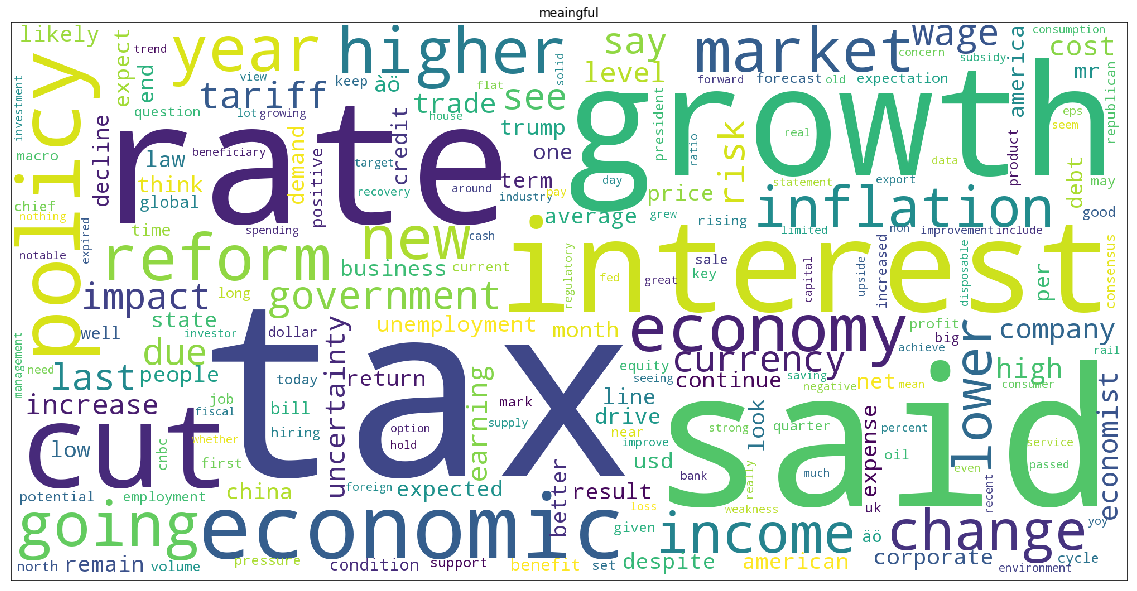

In [26]:

#wordcloud of meaningful
draw_cloud(corpus_meaningful,"meaingful",D_meaningful)

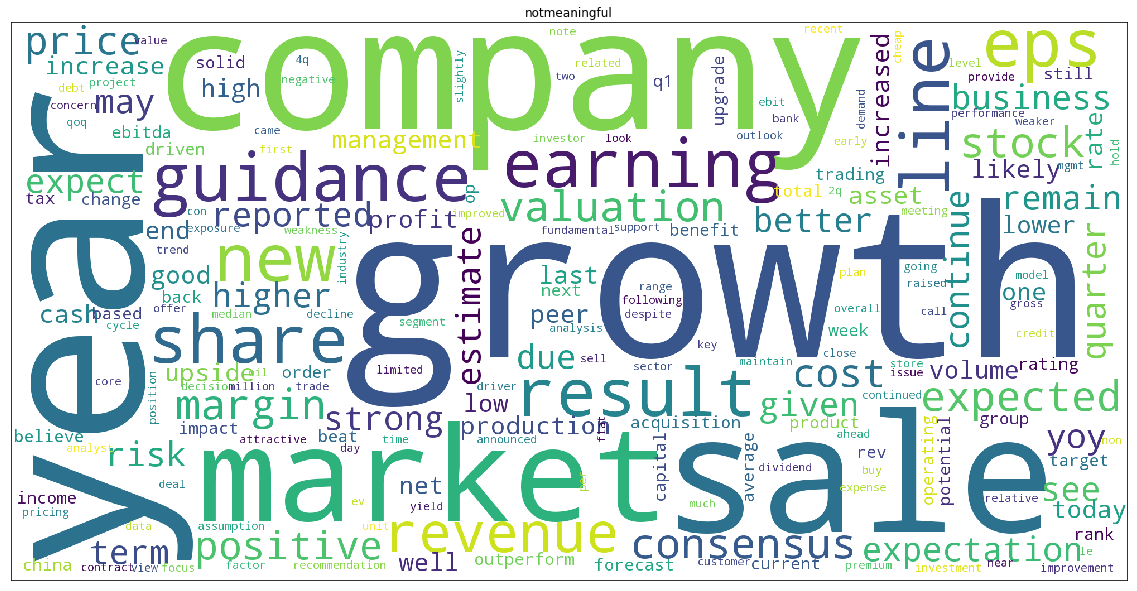

In [27]:
draw_cloud(corpus_notmeaningful,"notmeaningful",D_notmeaningful)

In [300]:
%%time
coherence_values=[]
lda_list=[]
for topic_number in range(1,10,1):
    ldamodel=gensim.models.ldamulticore.LdaMulticore(corpus_meaningful,id2word=D_meaningful,num_topics=topic_number,passes=10,workers=4)
    coherencemodel=CoherenceModel(model=ldamodel,dictionary=D_meaningful,corpus=corpus_meaningful,texts=corpus_list_meaningful,coherence='c_v')
    coherence_value=coherencemodel.get_coherence()
    lda_list.append(ldamodel)
    coherence_values.append(coherence_value)

Wall time: 1min 46s


<function matplotlib.pyplot.show>

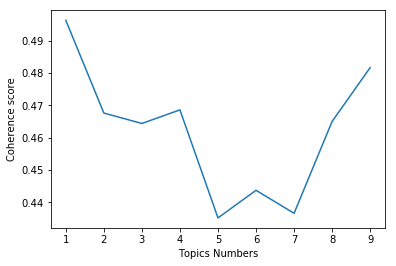

In [301]:
x = range(1,10,1)
plt.plot(x, coherence_values)
plt.xlabel("Topics Numbers")
plt.ylabel("Coherence score")
plt.show

In [ ]:
optimal_model = lda_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics())
vis = pyLDAvis.gensim.prepare(optimal_model, corpus_meaningful,D_meaningful)
pyLDAvis.save_html(vis,"lda_meaningful.html")
pyLDAvis.show(vis)

# vectorize documents and visulization

In [347]:
model = gensim.models.KeyedVectors.load_word2vec_format('C:/Users/lindsay/Desktop/758W/modelling/GoogleNews-vectors-negative300.bin', binary=True)  

In [340]:
# train our own word2vec model
w2vmodel=Word2Vec(size=300,window=10,workers=4,iter=50,min_count=5)
w2vmodel.build_vocab(corpus_list)
w2vmodel.train(corpus_list,total_examples=w2vmodel.corpus_count,epochs=50)

(786603, 1208200)

In [352]:
class TfidfEmbeddingVectorizer_filtered(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        

    def fit(self, X):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        # if a word was never seen - it must be at least as infrequent
        # as any of the known words - so the default idf is the max of 
        # known idf's
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])

        return self

    def transform(self, filtered_X):
        return np.array([
                np.mean([self[w] * self.word2weight[w]
                         for w in words if w in self.index2word] or
                        [np.zeros((300,))], axis=0)
                for words in filtered_X
            ])

In [353]:
TfidfEmbeddingVectorizer_filtered.fit(model,corpus_list) 
transformed_result=TfidfEmbeddingVectorizer_filtered.transform(model,corpus_list) 

In [342]:
TfidfEmbeddingVectorizer_filtered.fit(w2vmodel,corpus_list) 
transformed_result_2=TfidfEmbeddingVectorizer_filtered.transform(w2vmodel,corpus_list) 

In [356]:
new_matrix=pd.DataFrame(transformed_result)
new_matrix.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
2925,-0.407137,-0.457595,0.143603,0.849172,-0.488582,-0.322237,0.179539,-0.146876,0.655102,0.803866,...,-0.416727,1.054824,-0.361386,-0.393408,0.069641,-0.163985,0.172993,0.384690,0.174379,-0.789323
2926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2927,-0.573676,-0.146794,-0.192377,0.236366,-0.728725,0.359278,0.659753,-0.422180,1.275209,0.792958,...,-0.336786,0.311170,-0.213161,0.125390,-0.007063,0.511667,0.447909,-0.820183,0.287556,-0.301429
2928,0.177053,0.656523,0.905897,0.746261,-0.421356,-0.004202,0.438153,-0.621928,0.482510,0.656879,...,-0.606350,0.385057,-0.494141,0.348818,-0.721726,0.261036,-0.073335,-0.073341,0.963488,-0.212794
2929,-1.892853,0.965230,-0.952694,-0.115169,-0.321221,-1.353828,0.695717,-0.799135,0.488882,0.067770,...,-1.052978,0.598568,1.002836,0.319654,-0.063069,-0.730190,0.070512,0.742725,0.482615,0.013515


In [354]:
tax=[]
for i in range(0,len(transformed_result_2)):
    distances=distance.cosine(transformed_result[i],w2vmodel.wv["tax"])
    tax.append(distances)


growth=[]
for i in range(0,len(transformed_result_2)):
    distances=distance.cosine(transformed_result[i],w2vmodel.wv["growth"])
    growth.append(distances)

war=[]
for i in range(0,len(transformed_result_2)):
    distances=distance.cosine(transformed_result[i],w2vmodel.wv["war"])
    war.append(distances)

economic=[]
for i in range(0,len(transformed_result_2)):
    distances=distance.cosine(transformed_result[i],w2vmodel.wv["economic"])
    economic.append(distances)

currency=[]
for i in range(0,len(transformed_result_2)):
    distances=distance.cosine(transformed_result[i],w2vmodel.wv["currency"])
    currency.append(distances)

income=[]
for i in range(0,len(transformed_result_2)):
    distances=distance.cosine(transformed_result[i],w2vmodel.wv["income"])
    income.append(distances)

trade=[]
for i in range(0,len(transformed_result_2)):
    distances=distance.cosine(transformed_result[i],w2vmodel.wv["trade"])
    trade.append(distances)


inflation=[]
for i in range(0,len(transformed_result_2)):
    distances=distance.cosine(transformed_result[i],w2vmodel.wv["inflation"])
    inflation.append(distances)


interest=[]
for i in range(0,len(transformed_result_2)):
    distances=distance.cosine(transformed_result[i],w2vmodel.wv["interest"])
    interest.append(distances)

rate=[]
for i in range(0,len(transformed_result_2)):
    distances=distance.cosine(transformed_result[i],w2vmodel.wv["rate"])
    rate.append(distances)
len(rate)

policy=[]
for i in range(0,len(transformed_result_2)):
    distances=distance.cosine(transformed_result[i],w2vmodel.wv["policy"])
    policy.append(distances)
len(policy)

subsidy=[]
for i in range(0,len(transformed_result_2)):
    distances=distance.cosine(transformed_result[i],w2vmodel.wv["subsidy"])
    subsidy.append(distances)
len(subsidy)

unemployment=[]
for i in range(0,len(transformed_result_2)):
    distances=distance.cosine(transformed_result[i],w2vmodel.wv["unemployment"])
    unemployment.append(distances)
len(unemployment)

employment=[]
for i in range(0,len(transformed_result_2)):
    distances=distance.cosine(transformed_result[i],w2vmodel.wv["employment"])
    employment.append(distances)
len(employment)

job=[]
for i in range(0,len(transformed_result_2)):
    distances=distance.cosine(transformed_result[i],w2vmodel.wv["job"])
    job.append(distances)
len(job)

reform=[]
for i in range(0,len(transformed_result_2)):
    distances=distance.cosine(transformed_result[i],w2vmodel.wv["reform"])
    reform.append(distances)
len(reform)

tariff=[]
for i in range(0,len(transformed_result_2)):
    distances=distance.cosine(transformed_result[i],w2vmodel.wv["tariff"])
    tariff.append(distances)
len(tariff)

C:\Users\lindsay\AppData\Roaming\Python\Python36\site-packages\scipy\spatial\distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


2930

In [355]:
distancedf=pd.DataFrame({"topic_tax":tax,"topic_growth":growth,"topic_war":war,"topic_economic":economic,"topic_currency":currency,"topic_income":income,
                         "topic_trade":trade,"topic_inflation":inflation,"topic_interest":interest,"topic_rate":rate,
                         "topic_policy":policy,"topic_subsidy":subsidy,"topic_unemployment":unemployment,"topic_employment":employment,
                         "topic_job":job,"topic_reform":reform,"topic_tariff":tariff})
distancedf.to_csv("C:/Users/lindsay/Desktop/758W/modelling/data/distance_google.csv")

In [357]:
new_matrix["Y"]=textonly["Y"]

In [358]:
new_matrix.head(5)

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Y
0,-0.332883,0.216055,0.171639,0.133769,-0.271961,-0.002153,0.137965,-0.857538,0.969585,1.008446,...,0.610112,-0.860874,-0.135216,0.035920,-0.245200,-0.096926,-0.843485,0.020105,-0.010737,meaningful
1,-0.047413,-0.549493,-0.393293,0.820797,-0.278075,0.428138,0.603704,-0.445098,0.338216,0.193896,...,0.111139,-0.182595,-0.404102,-0.064742,0.265515,0.120863,0.011039,-0.004720,0.646319,meaningful
2,-0.077114,-0.171326,-0.708261,0.763738,-0.461341,-0.374721,0.064213,-0.951694,0.918163,0.215791,...,-0.266286,-0.578659,-0.213139,-0.574625,0.071752,0.247289,-0.099165,0.319684,-1.001269,meaningful
3,-0.762835,-0.177194,-0.340485,-0.183380,0.131023,-0.577404,-0.004144,-0.877531,0.938255,0.825943,...,0.343610,-0.760935,0.156150,-0.535167,-0.240737,0.182773,0.080095,-0.111825,-0.342070,meaningful
4,0.322823,0.250405,-0.014969,0.507638,0.278293,-0.114622,0.747029,-0.581048,0.756249,0.175908,...,0.582619,-1.115919,-0.001860,-0.208155,0.000976,0.221291,0.027573,0.161367,-0.486353,meaningful


In [359]:
new_matrix.to_csv("nlp_w2v_matrix_google.csv")

In [313]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
datapoint_2= tsne_model.fit_transform(transformed_result_2)

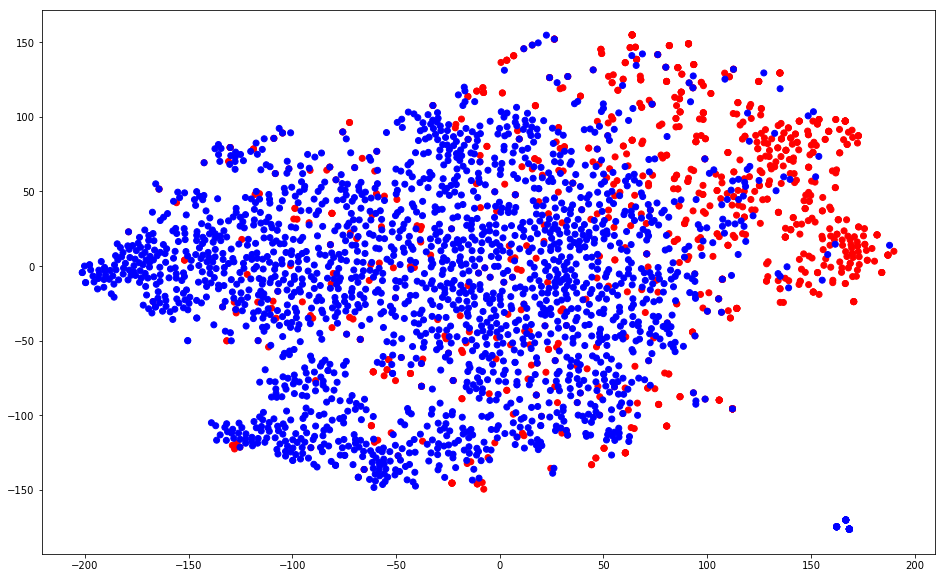

In [314]:
color=["red","blue"]
color_list_nv=[color[0] if i=="meaningful" else color[1] for i in textonly["Y"]]
plt.figure(figsize=(16, 10)) 
plt.scatter(datapoint_2[:,0],datapoint_2[:,1],c=color_list_nv)
plt.show()

# prediction

#KNN on 300 dimension on word2vecmodel

In [315]:
from sklearn.neighbors import KNeighborsClassifier

In [316]:
from sklearn.preprocessing import scale

In [317]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [318]:
laccuracy=[]
type(laccuracy)
laccuracy.append(1)
laccuracy

[1]

In [319]:
laccuracy=[]
lprecision=[]
lrecall=[]
lk=[]
for k in range(1,200):
    knn=KNeighborsClassifier(n_neighbors=k, algorithm='auto', leaf_size=30, metric='cosine',
           metric_params=None, n_jobs=4,
           weights='distance')
    model=knn.fit(scale(transformed_result_2), textonly["Y"]) 
    prediction=knn.predict(scale(transformed_result_2))
    accuracy=accuracy_score(textonly["Y"],prediction)
    precision=precision_score(textonly["Y"],prediction,pos_label="meaningful")
    recall=recall_score(textonly["Y"],prediction,pos_label="meaningful")
    lk.append(k)
    laccuracy.append(accuracy)
    lprecision.append(precision)
    lrecall.append(recall)

In [320]:
import seaborn as sns

In [321]:
print(laccuracy)
print(lprecision)
print(lrecall)

[0.948122866894198, 0.948122866894198, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252563, 0.94846416382252

D:\anacoda\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


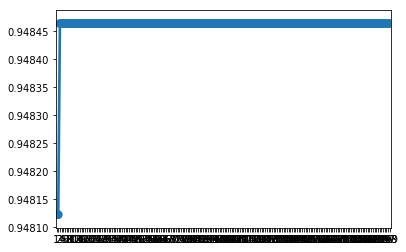

In [322]:
sns.pointplot(x=lk,y=laccuracy)

D:\anacoda\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


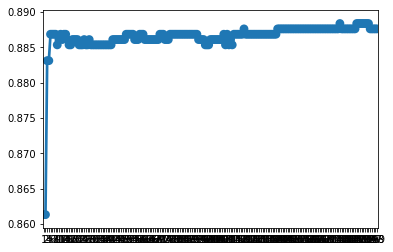

In [323]:
sns.pointplot(x=lk,y=lprecision)

D:\anacoda\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


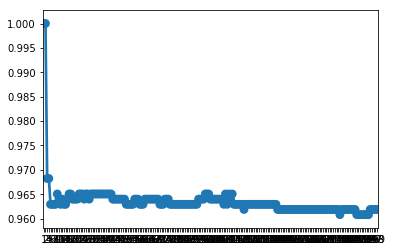

In [324]:
sns.pointplot(x=lk,y=lrecall)

In [325]:
max(lprecision)

0.88834476003917728

In [326]:
lprecision.index(max(lprecision))

176

In [327]:
lrecall[82]

0.96292372881355937

In [328]:
laccuracy[82]

0.94846416382252563

In [329]:
model=knn.fit(scale(transformed_result_2), textonly["Y"]) 

In [330]:
prediction=knn.predict(scale(transformed_result_2))

In [101]:
accuracy=accuracy_score(textonly["Y"],prediction)
accuracy
type(float(accuracy))

float

In [88]:
precision_score(textonly["Y"],prediction,pos_label="meaningful")

0.88309178743961347

In [89]:
recall_score(textonly["Y"],prediction,pos_label="meaningful")

0.96822033898305082

In [65]:
confusion=confusion_matrix(textonly["Y"],prediction)
confusion

array([[ 940,    4],
       [ 147, 1839]], dtype=int64)

In [80]:
print("precision_score:",940/(940+147))

precision_score: 0.8647654093836247


In [63]:
print("recall_score:",703/(703+241))

recall_score: 0.7447033898305084


In [165]:
print("precision_score:",712/(712+177))
print("recall_score:",712/(712+232))

precision_score: 0.8008998875140607
recall_score: 0.7542372881355932


In [164]:
print(accuracy3)
print(confusion3)

0.860409556314
[[ 712  232]
 [ 177 1809]]
